2501985451 - Jason Adriel\
UTS Deep Learning



#0. Prerequisites

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Superglobals
GLOBAL_SEED = 1
BATCH_SIZE = 32

# Seeding
keras.utils.set_random_seed(GLOBAL_SEED)

# Library Setup
sns.set_style('whitegrid')

In [2]:
# Dataset Download
!wget "https://raw.githubusercontent.com/subtle64/Datasets/main/Others/dataset_spine.csv" -O "dataset_spine.csv"

--2023-11-10 04:17:49--  https://raw.githubusercontent.com/subtle64/Datasets/main/Others/dataset_spine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42544 (42K) [text/plain]
Saving to: ‘dataset_spine.csv’

dataset_spine.csv   100%[===================>]  41.55K  --.-KB/s    in 0.01s   

2023-11-10 04:17:49 (3.10 MB/s) - ‘dataset_spine.csv’ saved [42544/42544]



# Question 1:

#### **a.** The given dataset has several problems, preprocess the data to solve the problems from the data. Mention what problems you found from the given data, give an explanation of what approach you used and why you chose the chosen approach? Do the Exploratory Data Analysis to understand the problem.

##### a.1: Exploring the Dataset

In [3]:
# Reading the dataset
df_spine = pd.read_csv("dataset_spine.csv")
df_spine.head()

,Unnamed: 0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
# 1 invalid column, 12 numeric predictors, and 1 target
df_spine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  310 non-null    int64  
 1   Col1        310 non-null    float64
 2   Col2        310 non-null    float64
 3   Col3        310 non-null    float64
 4   Col4        310 non-null    float64
 5   Col5        310 non-null    float64
 6   Col6        310 non-null    float64
 7   Col7        310 non-null    float64
 8   Col8        310 non-null    float64
 9   Col9        310 non-null    float64
 10  Col10       310 non-null    float64
 11  Col11       310 non-null    float64
 12  Col12       310 non-null    float64
 13  Class_att   310 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 34.0+ KB


In [5]:
# Viewing the distribution of the target class
df_spine.describe(include = [object])

,Class_att
count,310
unique,2
top,Abnormal
freq,210


Target seems to be binary and imbalanced, approx. 210/310 ~ 67.7% is 'Abnormal'.
Another issue here is the small size of the dataset. Splitting this to 80-10-10
will produce a test size of 31. Oversampling/Undersampling methods might introduce too much bias in this scenario. The only solution we currently have is just to stratify the dataset when splitting. The target also needs to be encoded here.

In [6]:
# No direct issues can be seen from the descriptive statistics
df_spine.describe()

,Unnamed: 0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,154.500000,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,89.633513,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,0.000000,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,77.250000,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,154.500000,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,231.750000,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,309.000000,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [7]:
# No missing values or duplicated rows seem to exist
print(f"Total Missing Values : {df_spine.isna().sum().sum()}")
print(f"Total Duplicated     : {df_spine.duplicated().sum()}")

Total Missing Values : 0
Total Duplicated     : 0


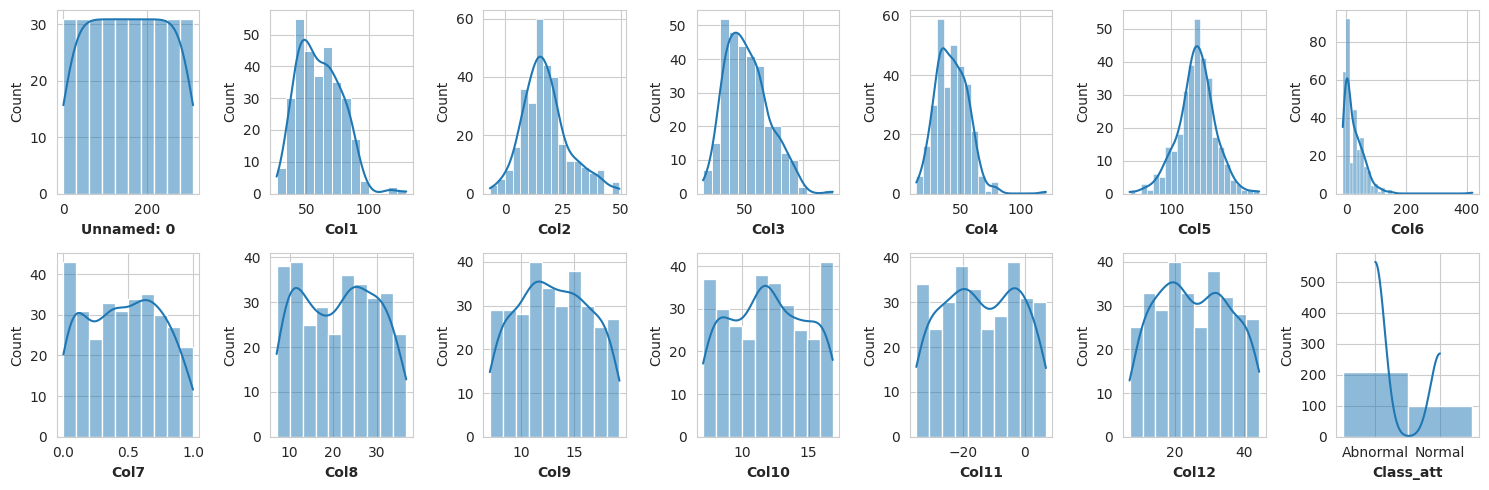

In [8]:
# Plotting the distribution of the dataset
def plot_distribution(df):
  fig, axes = plt.subplots(2, 7, figsize = (15, 5))
  axes = axes.flatten()
  for i, col in enumerate(df):
    sns.histplot(ax = axes[i], x = col, data = df, kde = True)
    axes[i].set_xlabel(col, fontdict = {'weight': 'bold'})
  plt.tight_layout()

plot_distribution(df_spine)

The distributions of the dataset is interesting.
Columns 1-6 show a skewed or normal distribution. Columns 7-12 follow a weird pattern almost close to a uniform distribution. Nonetheless, scaling the dataset seem to be a point to think about, since most of them have varying distributions. Although, of course, we need to test it if it does anything at all to the model's accuracy.



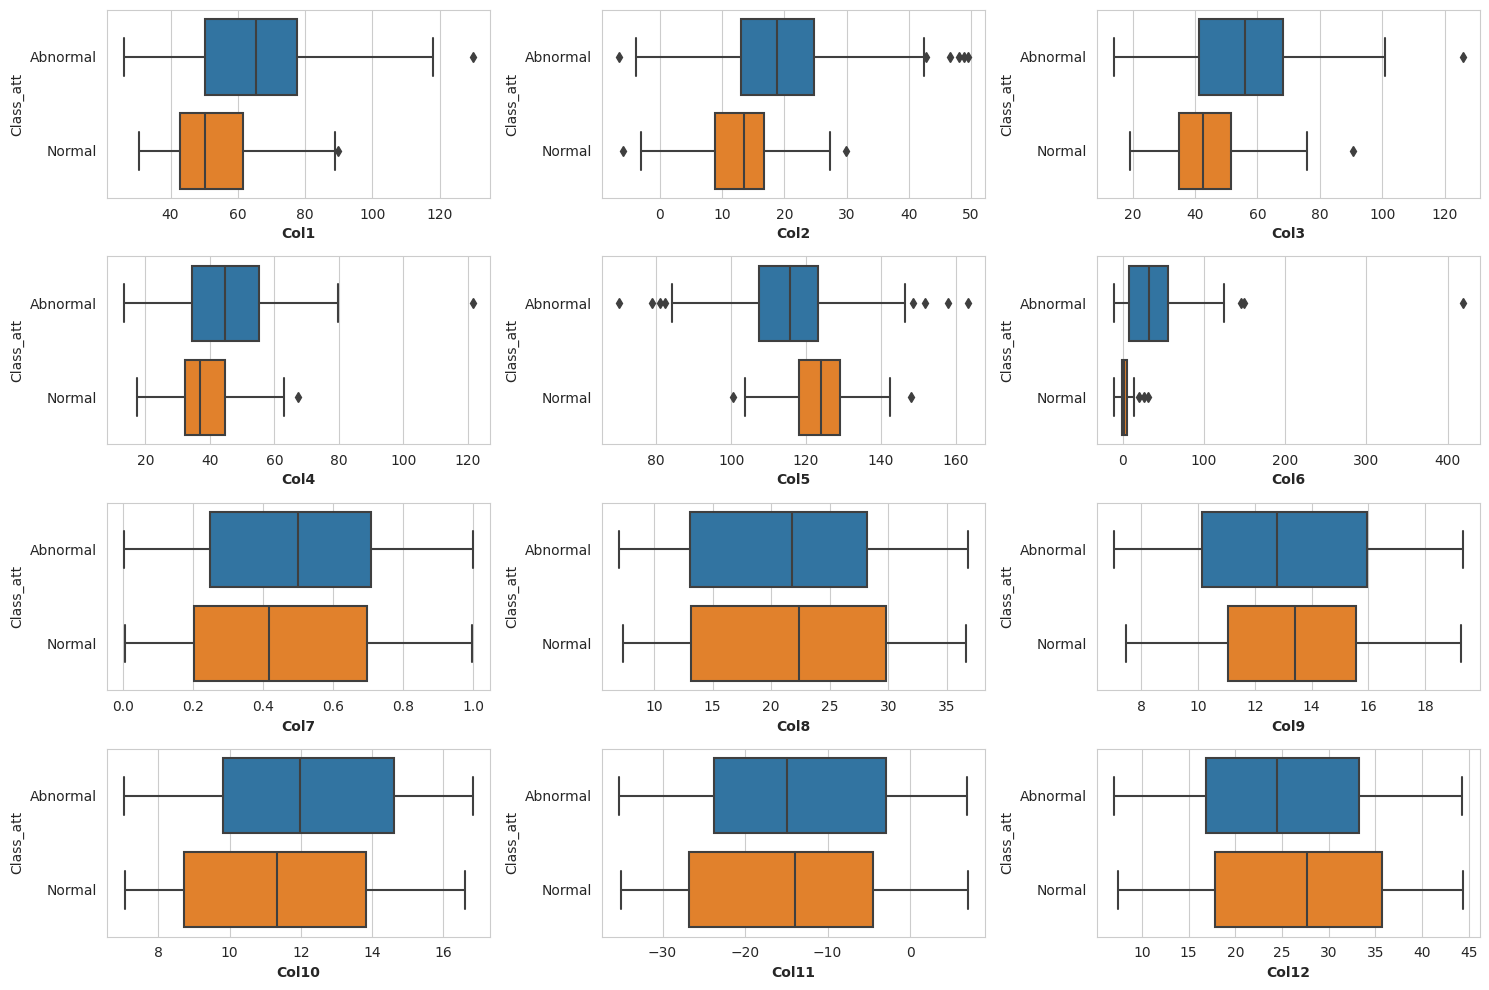

In [9]:
def boxplot(df, by):
  fig, axes = plt.subplots(4, 3, figsize = (15, 10))
  axes = axes.flatten()
  for i, col in enumerate(df.drop(by, axis = 1)):
    sns.boxplot(ax = axes[i], x = col, y = by, data = df)
    axes[i].set_xlabel(col, fontdict = {'weight': 'bold'})
  plt.tight_layout()

boxplot(df_spine.drop("Unnamed: 0", axis = 1), "Class_att")

From the boxplots themselves we can see which columns are capable of distinguishing the "Normal" from "Abnormal" and vice versa. Columns 1-6 seem to show at least some degree of separation, whereas Columns 7-12 does not. Column 6 here, however, seem to be the most interesting one of the bunch. There are, however, outliers. Let us continue to check to see the outliers.

In [10]:
def iqr_outlier(x, k):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1
  S = IQR*k
  lower_bound = Q1 - S
  upper_bound = Q3 + S
  outliers = [i for i in x if i < lower_bound or i > upper_bound]
  return outliers

def get_outliers(df, k = 1.5):
  outliers = {}
  for col in df:
    outliers[col] = iqr_outlier(df[col], k)
    print(f"Outliers in {col}: {outliers[col]}")
  return outliers

outliers_k15 = get_outliers(df_spine.drop(["Class_att", "Unnamed: 0"], axis = 1))

Outliers in Col1: [129.8340406, 118.1446548, 115.9232606]
Outliers in Col2: [41.55733141, 41.28630543, 39.82272448, 42.39620445, -6.554948347, 48.06953097, 39.84466878, 48.90365265, 42.68919513, 49.4318636, 40.30376567, 41.93368293, 46.55005318]
Outliers in Col3: [125.7423855]
Outliers in Col4: [121.4295656]
Outliers in Col5: [84.24141517, 148.5255624, 151.8398566, 163.0710405, 82.45603817, 81.0245406, 70.08257486, 78.99945411, 157.848799, 88.43424213, 147.8946372]
Outliers in Col6: [101.7190919, 145.3781432, 110.8607824, 148.7537109, 418.5430821, 118.3533701, 104.8592474, 124.9844057, 117.3146829, 101.2187828]
Outliers in Col7: []
Outliers in Col8: []
Outliers in Col9: []
Outliers in Col10: []
Outliers in Col11: []
Outliers in Col12: []


I do not have any additional domain knowledge on what this dataset is about. The small size of the dataset will be against us if we drop this much data. Let use increase the quartile range such that only obvious outliers are taken out, i.e., setting for a higher k.

In [11]:
outliers_k3 = get_outliers(df_spine.drop(["Class_att", "Unnamed: 0"], axis = 1), k = 3)

Outliers in Col1: []
Outliers in Col2: []
Outliers in Col3: []
Outliers in Col4: [121.4295656]
Outliers in Col5: []
Outliers in Col6: [418.5430821]
Outliers in Col7: []
Outliers in Col8: []
Outliers in Col9: []
Outliers in Col10: []
Outliers in Col11: []
Outliers in Col12: []


Setting a k this high should be enough to show the logically obvious outliers.

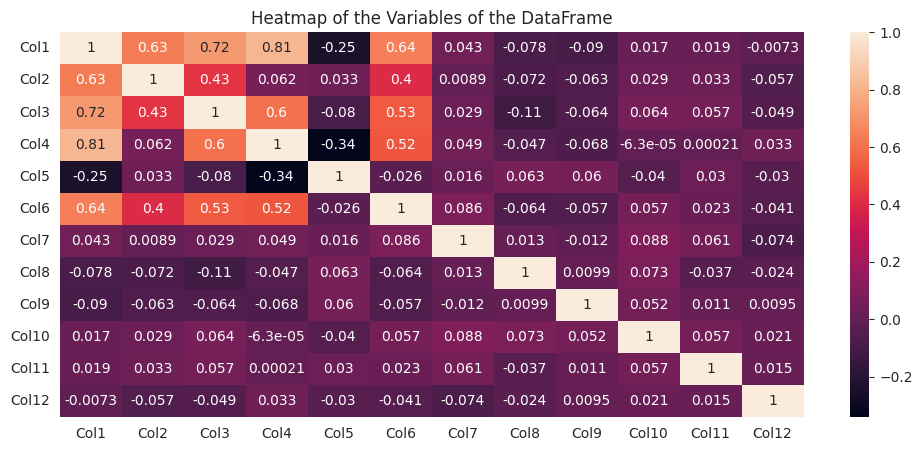

In [12]:
# Viewing the correlation heatmap of the variables
def plot_heatmap(df):
  plt.figure(figsize =(12, 5))
  sns.heatmap(df.corr(numeric_only = True), annot = True)
  plt.title("Heatmap of the Variables of the DataFrame")

plot_heatmap(df_spine.drop("Unnamed: 0", axis = 1))

An issue here is multicollinearity, as shown in Columns 1-6, which are all dependent on each other. A solution here is either to do PCA or tune the L2 regularizer in the ANN. I choose the latter, since PCA, in any case, removes data by shrinking the dimensions, which is not what we want for a small dataset where each entry is valuable.

In summary, there are 7 problems and the proposed solutions:
1. Unnamed: 0 is an index column -> **Drop it.**
2. Target is still of type str.  -> **Use LabelEncoder()**
3. Data is imbalanced and small. -> **Stratify**
4. Outliers exist, but no domain knowledge. -> **Drop logically obvious ones only.**
5. Data is skewed and have different scales. -> **Experiment with scaling.**
6. Multicollinearity exists. -> **Experiment with L2 Regularizers in ANN.**
7. No explanation on what this dataset is about or what the columns are. -> **Rely on logical reasoning and data.**




##### a.2: Creating the preprocessing pipeline

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def encode_target(df, target):
  df = df.copy()
  le = LabelEncoder()
  df[target] = le.fit_transform(df[target])
  return df

def remove_outliers(df):
  index = df[(df['Col6'] == 418.5430821) | (df['Col4'] == 121.4295656)].index[0]
  return df.drop(index = index).reset_index(drop = True)

def scale(df):
  df = df.copy()
  rs = StandardScaler().set_output(transform = 'pandas')
  x_scaled = rs.fit_transform(df.iloc[:, :-1])
  df.iloc[:, :-1] = x_scaled
  return df

def preprocess(df):
  df = df.copy()
  df = df.drop("Unnamed: 0", axis = 1)
  df = remove_outliers(df)
  df = encode_target(df, 'Class_att')
  df = scale(df)
  return df

df_spine_clean = preprocess(df_spine)
df_spine_clean.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,0.164240,0.498279,-0.664761,-0.175771,-1.449185,-0.837551,0.957337,-1.014613,0.431993,1.164683,-1.205316,1.710272,0
1,-1.264501,-0.751533,-1.451360,-1.082763,-0.266700,-0.677915,-0.198433,-0.977417,1.313021,1.676310,-0.948332,-0.911935,0
2,0.510189,0.464851,-0.099726,0.309224,-0.899585,-0.946078,0.011101,0.637177,1.299424,1.632796,-1.235993,-0.614146,0
3,0.537904,0.708418,-0.411318,0.153619,-1.208999,-0.457699,-0.359314,0.258155,-0.106918,-0.176519,-1.354167,-0.651390,0
4,-0.629374,-0.792446,-1.273382,-0.208517,-0.735462,-0.566793,0.251407,1.639686,0.848713,-1.058657,-0.196396,-0.069171,0


#### **b.** Separate your dataset into train, test, and validation, according to the following ratio: 80% train, 10% test, and 10% validation

In [14]:
# Splitting the data
from sklearn.model_selection import train_test_split

def split_data(df):
  x_train, x_test, y_train, y_test = train_test_split(df.drop('Class_att', axis = 1),
                                                      df['Class_att'],
                                                      stratify = df['Class_att'],
                                                      test_size = 0.2,
                                                      random_state = GLOBAL_SEED)

  x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,
                                                  stratify = y_test,
                                                  random_state = GLOBAL_SEED)

  return x_train, x_val, x_test, y_train, y_val, y_test

x_train, x_val, x_test, y_train, y_val, y_test = split_data(df_spine_clean)
print(f"Length of train : {len(x_train)}")
print(f"Length of val   : {len(x_val)}")
print(f"Length of test  : {len(x_test)}")

Length of train : 247
Length of val   : 31
Length of test  : 31


#### **c**. Create an architecture with the provision that there are 3 hidden layers, where each hidden layer uses sigmoid as an activation function. Where the number of neurons in the first hidden layer is always 512 and each subsequent layer will be N/2, where N is the number of neurons in the previous layer. In the output layer, use the activation function softmax. Display validation loss and training loss graphs.

In [15]:
from keras import layers

N_FEATURES = x_train.shape[1]
INPUT_SHAPE = (N_FEATURES, )
N_NEURONS = 512
N_CLASSES = 2

# ANN-1 MODEL DEFINITION
inputs = layers.Input(INPUT_SHAPE)
dense_1 = layers.Dense(N_NEURONS, activation = 'sigmoid')(inputs)
dense_2 = layers.Dense(N_NEURONS/2, activation = 'sigmoid')(dense_1)
dense_3 = layers.Dense(N_NEURONS/4, activation = 'sigmoid')(dense_2)
outputs = layers.Dense(N_CLASSES, activation = 'softmax')(dense_3)
# END DEFINITION

ann_1 = keras.Model(inputs, outputs, name = 'ANN-1')
ann_1.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
ann_1.summary()

Model: "ANN-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 512)               6656      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 171138 (668.51 KB)
Trainable params: 171138 (668.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Fitting the model
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 100,
        verbose = 1,
        restore_best_weights = True
    )
]

ann_results_1 = ann_1.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    batch_size = BATCH_SIZE,
    callbacks = callbacks,
    epochs = 500
)

Epoch 1/500
8/8 [==============================] - 2s 68ms/step - loss: 0.8785 - sparse_categorical_accuracy: 0.3239 - val_loss: 0.7305 - val_sparse_categorical_accuracy: 0.3226
Epoch 2/500
8/8 [==============================] - 0s 17ms/step - loss: 0.6753 - sparse_categorical_accuracy: 0.6032 - val_loss: 0.6317 - val_sparse_categorical_accuracy: 0.6774
Epoch 3/500
8/8 [==============================] - 0s 17ms/step - loss: 0.6294 - sparse_categorical_accuracy: 0.6761 - val_loss: 0.6312 - val_sparse_categorical_accuracy: 0.6774
Epoch 4/500
8/8 [==============================] - 0s 16ms/step - loss: 0.6357 - sparse_categorical_accuracy: 0.6761 - val_loss: 0.6344 - val_sparse_categorical_accuracy: 0.6774
Epoch 5/500
8/8 [==============================] - 0s 18ms/step - loss: 0.6348 - sparse_categorical_accuracy: 0.6761 - val_loss: 0.6278 - val_sparse_categorical_accuracy: 0.6774
Epoch 6/500
8/8 [==============================] - 0s 18ms/step - loss: 0.6279 - sparse_categorical_accuracy: 

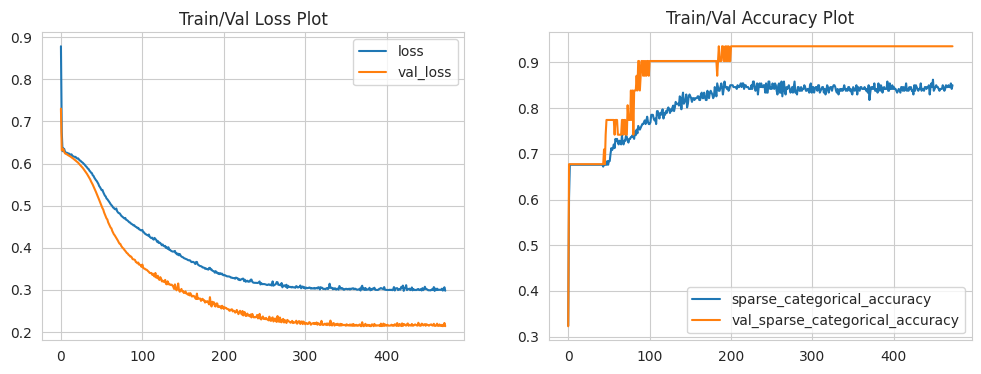

In [17]:
def plot_training_graphs(results):
  fig, axes = plt.subplots(1, 2, figsize = (12, 4))
  graph = pd.DataFrame(results.history)
  graph.loc[:, ['loss', 'val_loss']].plot(ax = axes[0], title = "Train/Val Loss Plot")
  graph.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(ax = axes[1], title = "Train/Val Accuracy Plot")

plot_training_graphs(ann_results_1)

In [18]:
from sklearn.metrics import classification_report
def evaluate_model(model, x_test, y_test):
  y_pred = np.argmax(model.predict(x_test), axis = 1)
  print(classification_report(y_test, y_pred))

evaluate_model(ann_1, x_test, y_test)

1/1 [==============================] - 0s 96ms/step
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.75      0.90      0.82        10

    accuracy                           0.87        31
   macro avg       0.85      0.88      0.86        31
weighted avg       0.88      0.87      0.87        31



From the graphs, we can see a hockey stick graph. (Mainly due to the model learning the imbalanceness of the dataset). Afterwards, since the initialization is terrible, the val_loss < training_loss. However, the main issue here is **the small size of the validation set**. I really doubt this validation set is capable of representing the entire data. Nonetheless, this model **underfits**, training loss is stuck at 0.3.

#### **d.** After knowing the result of (1c), modify the architecture in (1c) to get your optimal accuracy value (you can add or subtract the architecture, or change the hyperparameters, or use tuning on the hyperparameters). Explain your reasoning for using your chosen approach.

In [19]:
# ANN-2 MODEL DEFINITION
from keras import regularizers

inputs = layers.Input(INPUT_SHAPE)
dense_1 = layers.Dense(64, activation = 'tanh', activity_regularizer = regularizers.L2(1e-7))(inputs)
dropout_1 = layers.Dropout(0.1)(dense_1)

dense_2 = layers.Dense(32, activation = 'tanh', activity_regularizer = regularizers.L2(1e-7))(dropout_1)
dropout_2 = layers.Dropout(0.1)(dense_2)

dense_3 = layers.Dense(16, activation = 'tanh', activity_regularizer = regularizers.L2(1e-7))(dropout_2)
dropout_3 = layers.Dropout(0.1)(dense_3)

outputs = layers.Dense(N_CLASSES, activation = 'softmax')(dropout_3)
# END DEFINITION

ann_2 = keras.Model(inputs, outputs, name = 'ANN-2')
ann_2.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
ann_2.summary()

Model: "ANN-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_4 (Dense)             (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0     

In [20]:
ann_results_2 = ann_2.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    batch_size = BATCH_SIZE,
    callbacks = callbacks,
    epochs = 1000
)

Epoch 1/1000
8/8 [==============================] - 1s 36ms/step - loss: 0.6545 - sparse_categorical_accuracy: 0.6154 - val_loss: 0.5773 - val_sparse_categorical_accuracy: 0.6452
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6358 - sparse_categorical_accuracy: 0.6316 - val_loss: 0.5638 - val_sparse_categorical_accuracy: 0.6774
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6281 - sparse_categorical_accuracy: 0.6680 - val_loss: 0.5523 - val_sparse_categorical_accuracy: 0.6774
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6194 - sparse_categorical_accuracy: 0.6478 - val_loss: 0.5418 - val_sparse_categorical_accuracy: 0.6774
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6291 - sparse_categorical_accuracy: 0.6761 - val_loss: 0.5335 - val_sparse_categorical_accuracy: 0.7097
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6131 - sparse_categorical_accuracy:

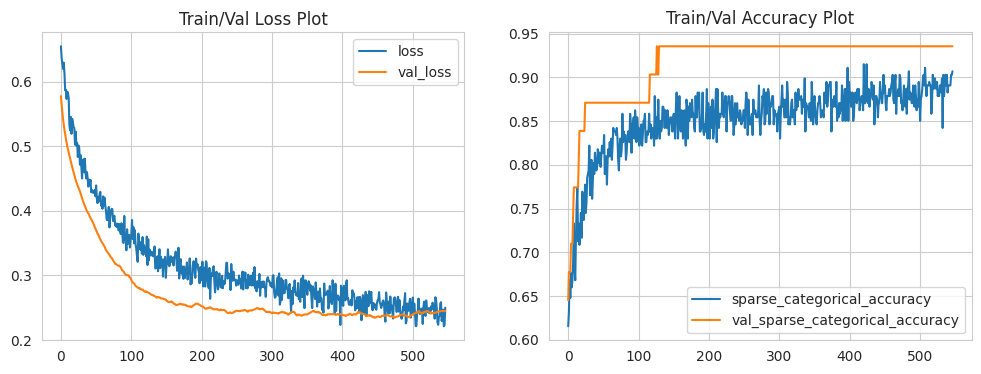

In [21]:
plot_training_graphs(ann_results_2)

In [22]:
evaluate_model(ann_2, x_test, y_test)

1/1 [==============================] - 0s 93ms/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.83      1.00      0.91        10

    accuracy                           0.94        31
   macro avg       0.92      0.95      0.93        31
weighted avg       0.95      0.94      0.94        31



There are a few main differences of the architecture that I did here. Firstly, I changed the activation function to tanh instead of sigmoid, since I read that tanh performs a bit better than sigmoid with respect to gradients. I tried ReLU and others (swish, SELU) but they tend to overfit to the training set and is unable to be regularized well. Nonetheless, I also changed the architecture to be 8 times smaller than the given one. Over complicating the model might not be that good with such a small dataset. To regulate overfitting, I added the Dropout() layers and also added L2 regularization to experiment. This resulted with a lower training loss, but somehow a greater validation loss, but the performance on the testing dataset was better. This shows the model *is* better.

#### **e**. Evaluate the performance of the above two architectures on the test set by finding the accuracy, precision, recall and F1-Score values. And provide a detailed explanation of the results.

In [23]:
# Performance of model 1
evaluate_model(ann_1, x_test, y_test)

1/1 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.75      0.90      0.82        10

    accuracy                           0.87        31
   macro avg       0.85      0.88      0.86        31
weighted avg       0.88      0.87      0.87        31



In [24]:
# Performance of model 2
evaluate_model(ann_2, x_test, y_test)

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.83      1.00      0.91        10

    accuracy                           0.94        31
   macro avg       0.92      0.95      0.93        31
weighted avg       0.95      0.94      0.94        31



The second model in all aspects, performs better than the first model. The average accuracy was greater, and the F1 Score (which is more important since the dataset is imbalanced) was also better on the second model. A great improvement, but sadly on a small test set, questioning whether or not the model is able to generalize in real life scenarios.

I have noted a few major issues that made me rethink my decisions, firstly, how come validation loss could be greater? I even found parameters that have very small training loss (0.01) and validation loss (0.11) but it performed poorly on the test set. I also found that random_state on the training-test-split gave huge differences (0.94 accuracy vs 0.87!). I mainly suspect this happens because of the dataset size being too small. It would be hard to evaluate the model if we are forced to use 80-10-10, perhaps other splitting ratios are better. Or perhaps if we were allowed to, we could use K-Fold Cross Validation, but check the minimum accuracy, so we can be sure whether or not the validation_loss is accurate.

#### **f.** Create a video to explain each code made to solve the above problems, provide an explanation of the architecture and results, and share your opinion on the evaluation result.

Link Video: https://youtu.be/o8C6SBK_QKs (Menit ke 00:00 - 12:52)